In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = 27 #None
pd.options.display.max_rows = 12 #None
sns.set_theme(style="darkgrid")

In [2]:
Forest_data=pd.read_excel('Germany_Forest_data_World_bank.xlsx')
Forest_data.dtypes

year                                                     int64
Forest area (% of land area)                           float64
Forest area (sq. km)                                   float64
Population density (people per sq. km of land area)    float64
Rural population growth (annual %)                     float64
                                                        ...   
Surface area (sq. km)                                  float64
Total natural resources rents (% of GDP)               float64
Urban population                                       float64
Urban population (% of total population)               float64
Urban population growth (annual %)                     float64
Length: 27, dtype: object

In [3]:
Forest_data.columns = Forest_data.columns.str.replace('%','prcnt')
Forest_data.columns
Forest_data.dtypes

year                                                     int64
Forest area (prcnt of land area)                       float64
Forest area (sq. km)                                   float64
Population density (people per sq. km of land area)    float64
Rural population growth (annual prcnt)                 float64
                                                        ...   
Surface area (sq. km)                                  float64
Total natural resources rents (prcnt of GDP)           float64
Urban population                                       float64
Urban population (prcnt of total population)           float64
Urban population growth (annual prcnt)                 float64
Length: 27, dtype: object

In [4]:
Forest_data.columns = Forest_data.columns.str.replace('.','', regex = True)
Forest_data.columns
Forest_data.dtypes

year                                                    int64
Forest area (prcnt of land area)                      float64
Forest area (sq km)                                   float64
Population density (people per sq km of land area)    float64
Rural population growth (annual prcnt)                float64
                                                       ...   
Surface area (sq km)                                  float64
Total natural resources rents (prcnt of GDP)          float64
Urban population                                      float64
Urban population (prcnt of total population)          float64
Urban population growth (annual prcnt)                float64
Length: 27, dtype: object

In [5]:
Forest_data.columns = Forest_data.columns.str.replace(' ','_')
Forest_data.columns

Index(['year', 'Forest_area_(prcnt_of_land_area)', 'Forest_area_(sq_km)',
       'Population_density_(people_per_sq_km_of_land_area)',
       'Rural_population_growth_(annual_prcnt)',
       'Rural_population_(prcnt_of_total_population)',
       'Agricultural_land_(prcnt_of_land_area)', 'Agricultural_land_(sq_km)',
       'Arable_land_(prcnt_of_land_area)', 'Arable_land_(hectares_per_person)',
       'Arable_land_(hectares)', 'Coal_rents_(prcnt_of_GDP)',
       'Forest_rents_(prcnt_of_GDP)', 'Land_area_(sq_km)',
       'Natural_gas_rents_(prcnt_of_GDP)', 'Oil_rents_(prcnt_of_GDP)',
       'Permanent_cropland_(prcnt_of_land_area)', 'Population_in_largest_city',
       'Population_in_the_largest_city_(prcnt_of_urban_population)',
       'Population_in_urban_agglomerations_of_more_than_1_million',
       'Population_in_urban_agglomerations_of_more_than_1_million_(prcnt_of_total_population)',
       'Rural_population', 'Surface_area_(sq_km)',
       'Total_natural_resources_rents_(prcnt_of

In [6]:
Forest_data
Forest_data_df = pd.DataFrame(Forest_data)
Forest_data_df


,year,Forest_area_(prcnt_of_land_area),Forest_area_(sq_km),Population_density_(people_per_sq_km_of_land_area),Rural_population_growth_(annual_prcnt),Rural_population_(prcnt_of_total_population),Agricultural_land_(prcnt_of_land_area),Agricultural_land_(sq_km),Arable_land_(prcnt_of_land_area),Arable_land_(hectares_per_person),Arable_land_(hectares),Coal_rents_(prcnt_of_GDP),Forest_rents_(prcnt_of_GDP),Land_area_(sq_km),Natural_gas_rents_(prcnt_of_GDP),Oil_rents_(prcnt_of_GDP),Permanent_cropland_(prcnt_of_land_area),Population_in_largest_city,Population_in_the_largest_city_(prcnt_of_urban_population),Population_in_urban_agglomerations_of_more_than_1_million,Population_in_urban_agglomerations_of_more_than_1_million_(prcnt_of_total_population),Rural_population,Surface_area_(sq_km),Total_natural_resources_rents_(prcnt_of_GDP),Urban_population,Urban_population_(prcnt_of_total_population),Urban_population_growth_(annual_prcnt)
0,1990,32.366167,113000.0,227.517054,0.335125,26.882,51.648383,180320.0,34.288088,0.150706,11971000.0,0.103669,0.088915,349130,0.020014,0.021215,1.268868,3421662,5.891307,7228538,9.100167,21353187.0,356970.0,0.234084,58079842.0,73.118,1.056365
1,2000,32.537613,113540.0,235.596813,-0.688010,25.035,48.912452,170680.0,33.827196,0.143581,11804000.0,0.015493,0.036197,348950,0.025420,0.019089,0.619000,3384417,5.491522,7259533,8.830312,20581651.0,357030.0,0.096422,61629857.0,74.965,0.411942
2,2012,32.745166,114130.0,230.750625,0.143934,22.830,47.810868,166640.0,33.953061,0.147142,11834000.0,0.056681,0.037338,348540,0.037434,0.032700,0.573822,3475555,5.599898,7663849,9.529090,18361215.0,357170.0,0.164903,62064608.0,77.170,0.200687
3,2013,32.718986,114150.0,231.155713,0.229090,22.820,47.858863,166970.0,34.040358,0.147262,11876000.0,0.024749,0.037903,348880,0.030888,0.028381,0.573263,3488177,5.604192,7705441,9.554694,18403327.0,357340.0,0.122609,62242278.0,77.180,0.285857
4,2014,32.722843,114170.0,232.108054,0.373046,22.810,47.936371,167250.0,34.018343,0.146563,11869000.0,0.017071,0.036870,348900,0.020178,0.022674,0.581829,3500863,5.600450,7747444,9.566813,18472108.0,357380.0,0.097186,62510392.0,77.190,0.429834
5,2015,32.732328,114190.0,234.152987,0.821852,22.800,47.959067,167310.0,33.956315,0.145018,11846000.0,0.012314,0.035405,348860,0.014979,0.010968,0.587628,3513595,5.571646,7793307,9.540495,18624547.0,357409.0,0.073667,63062064.0,77.200,0.878657
6,2016,32.685482,114190.0,235.712929,0.701902,22.776,47.678612,166570.0,33.667277,0.142832,11762000.0,0.012536,0.033125,349360,0.008309,0.008254,0.572475,3526391,5.545256,7843290,9.524489,18755733.0,357580.0,0.062224,63592936.0,77.224,0.838301
7,2017,32.684546,114190.0,236.588723,0.211142,22.739,47.763116,166870.0,33.694937,0.142420,11772000.0,0.015510,0.028794,349370,0.011109,0.011276,0.569597,3539234,5.542036,7893815,9.550086,18795376.0,357580.0,0.066689,63861626.0,77.261,0.421625
8,2018,32.683611,114190.0,237.294012,0.075990,22.688,47.641536,166450.0,33.576621,0.141498,11731000.0,0.016377,0.038990,349380,0.013356,0.015789,0.569580,3552123,5.541869,7944887,9.583031,18809664.0,357580.0,0.084512,64096118.0,77.312,0.366515
9,2019,32.683611,114190.0,237.829761,-0.056966,22.624,NaN,NaN,NaN,NaN,NaN,0.009228,0.031684,349380,0.009744,0.013395,NaN,3556792,5.532074,7977060,9.600163,18798952.0,NaN,0.094415,64294010.0,77.376,0.308267


In [7]:
Forest_data_df.columns

Index(['year', 'Forest_area_(prcnt_of_land_area)', 'Forest_area_(sq_km)',
       'Population_density_(people_per_sq_km_of_land_area)',
       'Rural_population_growth_(annual_prcnt)',
       'Rural_population_(prcnt_of_total_population)',
       'Agricultural_land_(prcnt_of_land_area)', 'Agricultural_land_(sq_km)',
       'Arable_land_(prcnt_of_land_area)', 'Arable_land_(hectares_per_person)',
       'Arable_land_(hectares)', 'Coal_rents_(prcnt_of_GDP)',
       'Forest_rents_(prcnt_of_GDP)', 'Land_area_(sq_km)',
       'Natural_gas_rents_(prcnt_of_GDP)', 'Oil_rents_(prcnt_of_GDP)',
       'Permanent_cropland_(prcnt_of_land_area)', 'Population_in_largest_city',
       'Population_in_the_largest_city_(prcnt_of_urban_population)',
       'Population_in_urban_agglomerations_of_more_than_1_million',
       'Population_in_urban_agglomerations_of_more_than_1_million_(prcnt_of_total_population)',
       'Rural_population', 'Surface_area_(sq_km)',
       'Total_natural_resources_rents_(prcnt_of

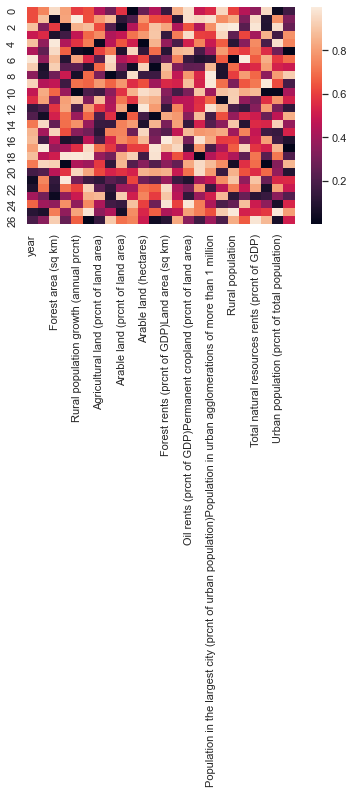

In [8]:
# Create a dataset
#figsize = (14, 8.5)
Forest_data = pd.DataFrame(np.random.random((27,24)), columns=["year",
                                                             "Forest area (prcnt of land area)",
                                                             "Forest area (sq km)",
                                                             "Population density (people per sq km of land area)",
                                                             "Rural population growth (annual prcnt)",
                                                             "Rural population (prcnt of total population)",
                                                             "Agricultural land (prcnt of land area)",
                                                             "Agricultural land (sq km)",
                                                             "Arable land (prcnt of land area)",
                                                             "Arable land (hectares per person)",
                                                             "Arable land (hectares)",
                                                             "Coal rents (prcnt of GDP)",
                                                             "Forest rents (prcnt of GDP)"
                                                             "Land area (sq km)",
                                                             "Natural gas rents (prcnt of GDP)",
                                                             "Oil rents (prcnt of GDP)"
                                                             "Permanent cropland (prcnt of land area)",
                                                             "Population in largest city",
                                                             "Population in the largest city (prcnt of urban population)"
                                                             "Population in urban agglomerations of more than 1 million",
                                                             "Population in urban agglomerations of more than 1 million (prcnt of total population)",
                                                             "Rural population",
                                                             "Surface area (sq km)",
                                                             "Total natural resources rents (prcnt of GDP)",
                                                             "Urban population",
                                                             "Urban population (prcnt of total population)",
                                                             "Urban population growth (annual prcnt)"])

# Default heatmap
p1 = sns.heatmap(Forest_data)

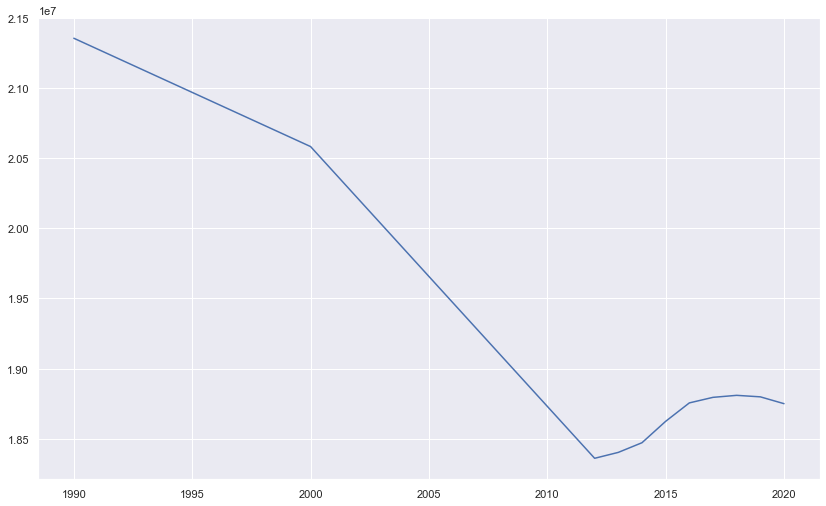

In [9]:
# Create bars
fig, ax = plt.subplots(figsize = (14, 8.5))

plt.plot(Forest_data_df["year"], Forest_data_df["Rural_population"])

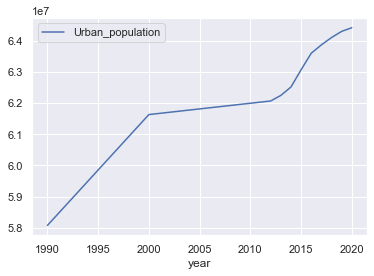

In [10]:
#plt.plot(Forest_data_df["year"], Forest_data_df["Urban_population"])
Forest_data_df.plot(x="year", y=["Urban_population"])
plt.show()

<Figure size 432x288 with 0 Axes>

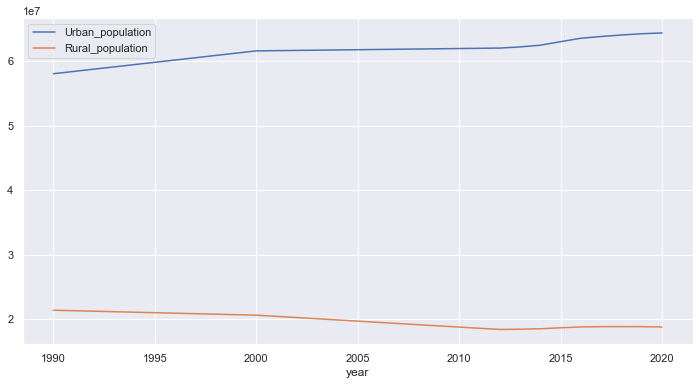

In [11]:
fig = ax.get_figure()
fig = plt.figure()
Forest_data_df.plot(x="year", 
                    y=["Urban_population", "Rural_population"],
                    figsize=(12, 6)).get_figure().savefig('urban_vs_rural.png', dpi=300)
plt.show()
#plt.savefig("urban_vs_rural.png")

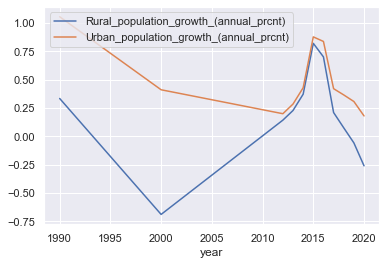

<Figure size 432x288 with 0 Axes>

In [12]:
Forest_data_df.plot(x="year", y=["Rural_population_growth_(annual_prcnt)","Urban_population_growth_(annual_prcnt)"])
plt.show()
plt.savefig("urban_vs_rural_growth.png")

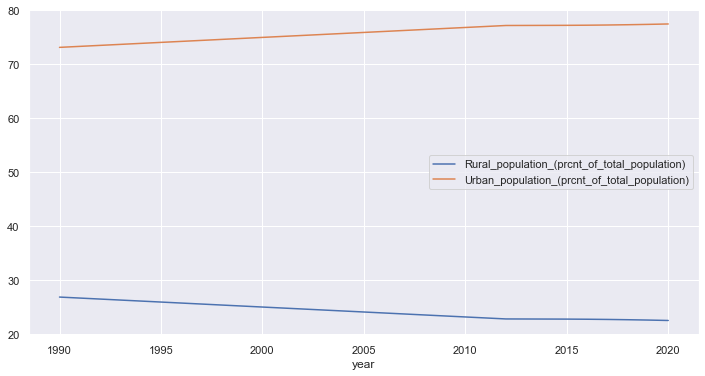

In [13]:
Forest_data_df.plot(x="year", 
                    y=["Rural_population_(prcnt_of_total_population)","Urban_population_(prcnt_of_total_population)"],
                    figsize=(12, 6)).get_figure().savefig('urban_vs_rural_total_pop.jpeg', dpi=300)
plt.show()
#plt.savefig("urban_vs_rural_total_pop.png")

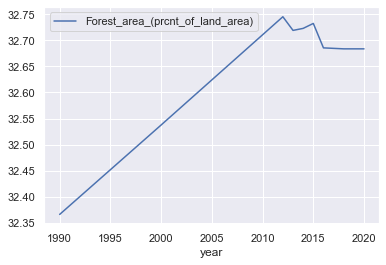

In [14]:
Forest_data_df.plot(x="year", y=["Forest_area_(prcnt_of_land_area)"])
plt.show()

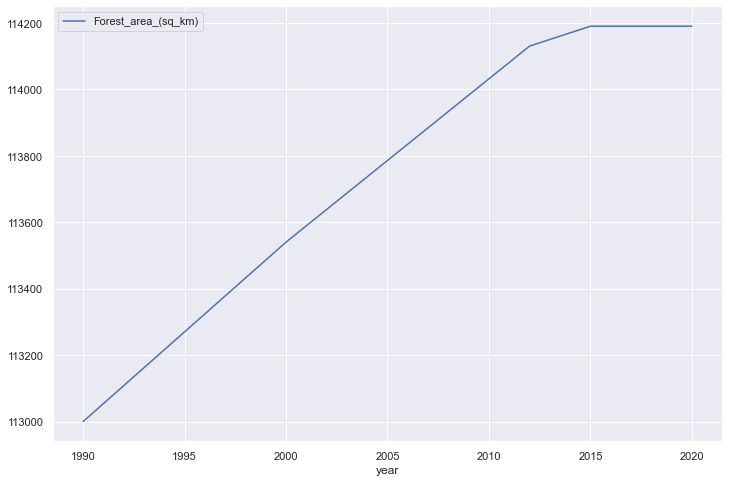

In [15]:
Forest_data_df.plot(x="year", 
                    y=["Forest_area_(sq_km)"],
                    figsize=(12, 8)).get_figure().savefig('Forest_area_per_sq_km.png', dpi=300)
plt.show()

In [16]:
Forest_data_df.columns

Index(['year', 'Forest_area_(prcnt_of_land_area)', 'Forest_area_(sq_km)',
       'Population_density_(people_per_sq_km_of_land_area)',
       'Rural_population_growth_(annual_prcnt)',
       'Rural_population_(prcnt_of_total_population)',
       'Agricultural_land_(prcnt_of_land_area)', 'Agricultural_land_(sq_km)',
       'Arable_land_(prcnt_of_land_area)', 'Arable_land_(hectares_per_person)',
       'Arable_land_(hectares)', 'Coal_rents_(prcnt_of_GDP)',
       'Forest_rents_(prcnt_of_GDP)', 'Land_area_(sq_km)',
       'Natural_gas_rents_(prcnt_of_GDP)', 'Oil_rents_(prcnt_of_GDP)',
       'Permanent_cropland_(prcnt_of_land_area)', 'Population_in_largest_city',
       'Population_in_the_largest_city_(prcnt_of_urban_population)',
       'Population_in_urban_agglomerations_of_more_than_1_million',
       'Population_in_urban_agglomerations_of_more_than_1_million_(prcnt_of_total_population)',
       'Rural_population', 'Surface_area_(sq_km)',
       'Total_natural_resources_rents_(prcnt_of

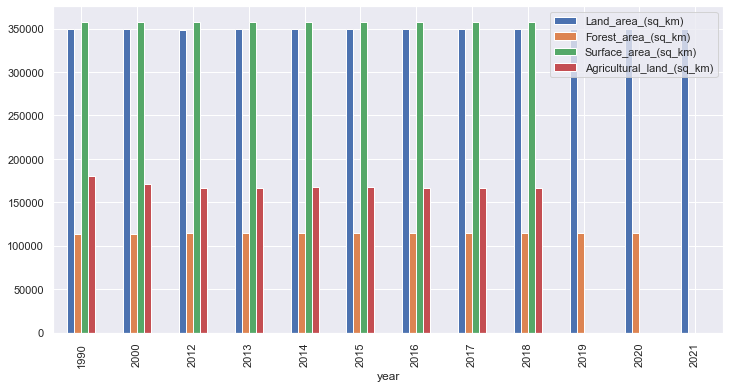

In [17]:
Forest_data_df.plot(x="year", 
                    y=["Land_area_(sq_km)","Forest_area_(sq_km)","Surface_area_(sq_km)","Agricultural_land_(sq_km)"],
                    kind="bar",
                    figsize=(12, 6)).get_figure().savefig('land_forest_surface_agri.png', dpi=300)
plt.show()
#plt.savefig('land_forest_surface_agri.png')

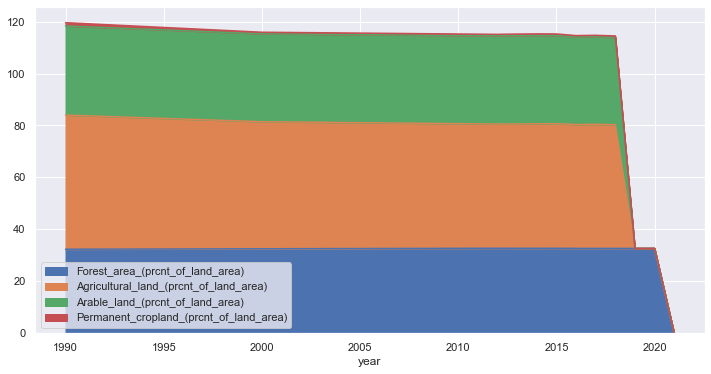

In [18]:

Forest_data_df.plot(x="year", 
                    y=["Forest_area_(prcnt_of_land_area)","Agricultural_land_(prcnt_of_land_area)","Arable_land_(prcnt_of_land_area)","Permanent_cropland_(prcnt_of_land_area)"], 
                    kind="area",
                    figsize=(12, 6)).get_figure().savefig('percnt_land_forest_surface_agri.png', dpi=300)
plt.show()
#plt.savefig("percnt_land_forest_surface_agri.pdf", dpi=300)
#plt.savefig('books_read.png')